<a href="https://colab.research.google.com/github/CamilaCSilva/C318/blob/main/C318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


IMPORTS


In [ ]:
pip install seaborn

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import chardet

In [ ]:
URL_PS_VENDAS_2019 = 'bancodados/201912.csv'
URL_ARQUIVO_GEOGRAFICO = "bancodados/geografia.csv"
URL_ARQUIVO_CARACTERISTICAS_PRODUTOS = "bancodados/caracteristicas_produtos_saude_suplementar.csv"
URL_ARQUIVO_LAT_LONG = "bancodados/latitude-longitude-cidades.csv"
URL_ARQUIVO_HISTORICO = "bancodados/HISTORICO_PLANOS.csv"

LEITURA DOS DATASETS

In [21]:
tabela_ps_vendas_2019 = pd.read_csv(URL_PS_VENDAS_2019, delimiter=";", low_memory=False, skiprows=lambda x: x > 0 and random.random() >= 0.001, quoting=csv.QUOTE_NONE, encoding='utf-8')
#, skiprows=lambda x: x > 0 and random.random() >= 0.001

#preenche campos com valor NaN com 0
tabela_ps_vendas_2019.fillna(0, inplace=True)

#tira as aspas das colunas e registros e transforma em int e float
tabela_ps_vendas_2019.columns = tabela_ps_vendas_2019.columns.str.replace('"', '')
tabela_ps_vendas_2019['CD_MUNICIPIO'] =  tabela_ps_vendas_2019['CD_MUNICIPIO'].str.replace('"', '').astype(int)
tabela_ps_vendas_2019['ID_PLANO'] =  tabela_ps_vendas_2019['ID_PLANO'].str.replace('"', '').astype(int)
tabela_ps_vendas_2019['CD_FAIXA_ETARIA'] =  tabela_ps_vendas_2019['CD_FAIXA_ETARIA'].str.replace('"', '').astype(int)
tabela_ps_vendas_2019['VCM'] =  tabela_ps_vendas_2019['VCM'].str.replace('"', '').str.replace(',', '.').astype(float)

In [ ]:
tabela_geografica = pd.read_csv(URL_ARQUIVO_GEOGRAFICO, sep=";")
tabela_geografica_simplificada = tabela_geografica[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF', 'NM_REGIAO']]

In [22]:
tabela_caracteristicas = pd.read_csv(URL_ARQUIVO_CARACTERISTICAS_PRODUTOS, delimiter=";", quoting=csv.QUOTE_NONE, encoding='utf-8')
tabela_caracteristicas_simplificada = tabela_caracteristicas[['ID_PLANO', 'CD_PLANO', 'NM_PLANO', 'CD_OPERADORA', 'GR_MODALIDADE',
                                                              'VIGENCIA_PLANO', 'GR_CONTRATACAO', 'SGMT_ASSISTENCIAL', 'COBERTURA',
                                                              'ABRANGENCIA_COBERTURA', 'ACOMODACAO_HOSPITALAR', 'SITUACAO_PLANO',
                                                              'DT_REGISTRO_PLANO']]

In [ ]:
tabela_lat_long = pd.read_csv(URL_ARQUIVO_LAT_LONG, delimiter=',')
tabela_lat_long_simplificada = tabela_lat_long[['NM_MUNICIPIO', 'latitude', 'longitude']]

In [ ]:
tabela_historico = pd.read_csv(URL_ARQUIVO_HISTORICO, sep=";", low_memory=False, quoting=csv.QUOTE_NONE, encoding='iso-8859-1', on_bad_lines='skip')
tabela_historico.rename({'#ID_PLANO': 'ID_PLANO'}, axis='columns', inplace = True)
tabela_historico_simplificada = tabela_historico[['ID_PLANO', 'DT_FIM_STATUS', 'DE_SITUACAO_PRINCIPAL']]

# tabela_ps_vendas_2019.columns = tabela_ps_vendas_2019.columns.str.replace('"', '')
tabela_historico_simplificada['DT_FIM_STATUS'] =  tabela_historico_simplificada['DT_FIM_STATUS'].str.replace('"', '')
tabela_historico_simplificada['DE_SITUACAO_PRINCIPAL'] =  tabela_historico_simplificada['DE_SITUACAO_PRINCIPAL'].str.replace('"', '')
# tabela_ps_vendas_2019['CD_FAIXA_ETARIA'] =  tabela_ps_vendas_2019['CD_FAIXA_ETARIA'].str.replace('"', '').astype(int)
# tabela_ps_vendas_2019['VCM'] =  tabela_ps_vendas_2019['VCM'].str.replace('"', '').str.replace(',', '.').astype(float)


MERGE DOS DATASETS

In [24]:
tabela_merge_vendas_geografia = pd.merge(tabela_ps_vendas_2019, tabela_geografica_simplificada, how='outer', on='CD_MUNICIPIO')

In [25]:
tabela_merge_vendas_geografia_caracteristicas = pd.merge(tabela_merge_vendas_geografia, tabela_caracteristicas, how='outer', on='ID_PLANO')

In [26]:
tabela_merge_vendas_geografia_caracteristicas_historico = pd.merge(tabela_merge_vendas_geografia_caracteristicas, tabela_historico_simplificada, how='outer', on='ID_PLANO')

In [27]:
tabela_merge_completa = pd.merge(tabela_merge_vendas_geografia_caracteristicas_historico, tabela_lat_long_simplificada, how='outer', on='NM_MUNICIPIO')

FILTRAGEM

In [ ]:
tabela_completa_filtrada = tabela_merge_completa[tabela_merge_completa['DE_SITUACAO_PRINCIPAL'] == 'ATIVO'] #108769
tabela_completa_filtrada.fillna(0, inplace=True)
tabela_completa_filtrada = tabela_completa_filtrada[tabela_completa_filtrada['VCM'] != 0]
tabela_completa_filtrada['NM_REGIAO'].nunique()
#tabela_completa_filtrada

In [ ]:
#tabela_merge_completa[tabela_merge_completa['SITUACAO_PLANO'] == 'Suspenso'] #73285
#tabela_merge_completa[tabela_merge_completa['SITUACAO_PLANO'] == 'Cancelado'] #70002
#tabela_merge_completa[tabela_merge_completa['SITUACAO_PLANO'] == 'Transferido'] #25541
#tabela_merge_completa[tabela_merge_completa['SITUACAO_PLANO'] != 'Ativo'] #174932 planos não ativos
#tabela_teste = tabela_merge_completa[tabela_merge_completa['SITUACAO_PLANO'] == 'Ativo']
#tabela_teste.fillna(0, inplace=True)
#tabela_teste[tabela_teste['VCM'] == 0] #24050 registros sem o preco do plano

ANALISES

In [31]:
print('Número de tipos de planos totais:')
print(tabela_merge_completa['ID_PLANO'].nunique())

print('Número de tipos de planos para planos ativos:')
print(tabela_completa_filtrada['ID_PLANO'].nunique())

Número de tipos de planos totais:
150531
Número de tipos de planos para planos ativos:
3252


In [32]:
print('Número de estados:')
tabela_completa_filtrada['SG_UF'].nunique()

Número de estados:


27

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


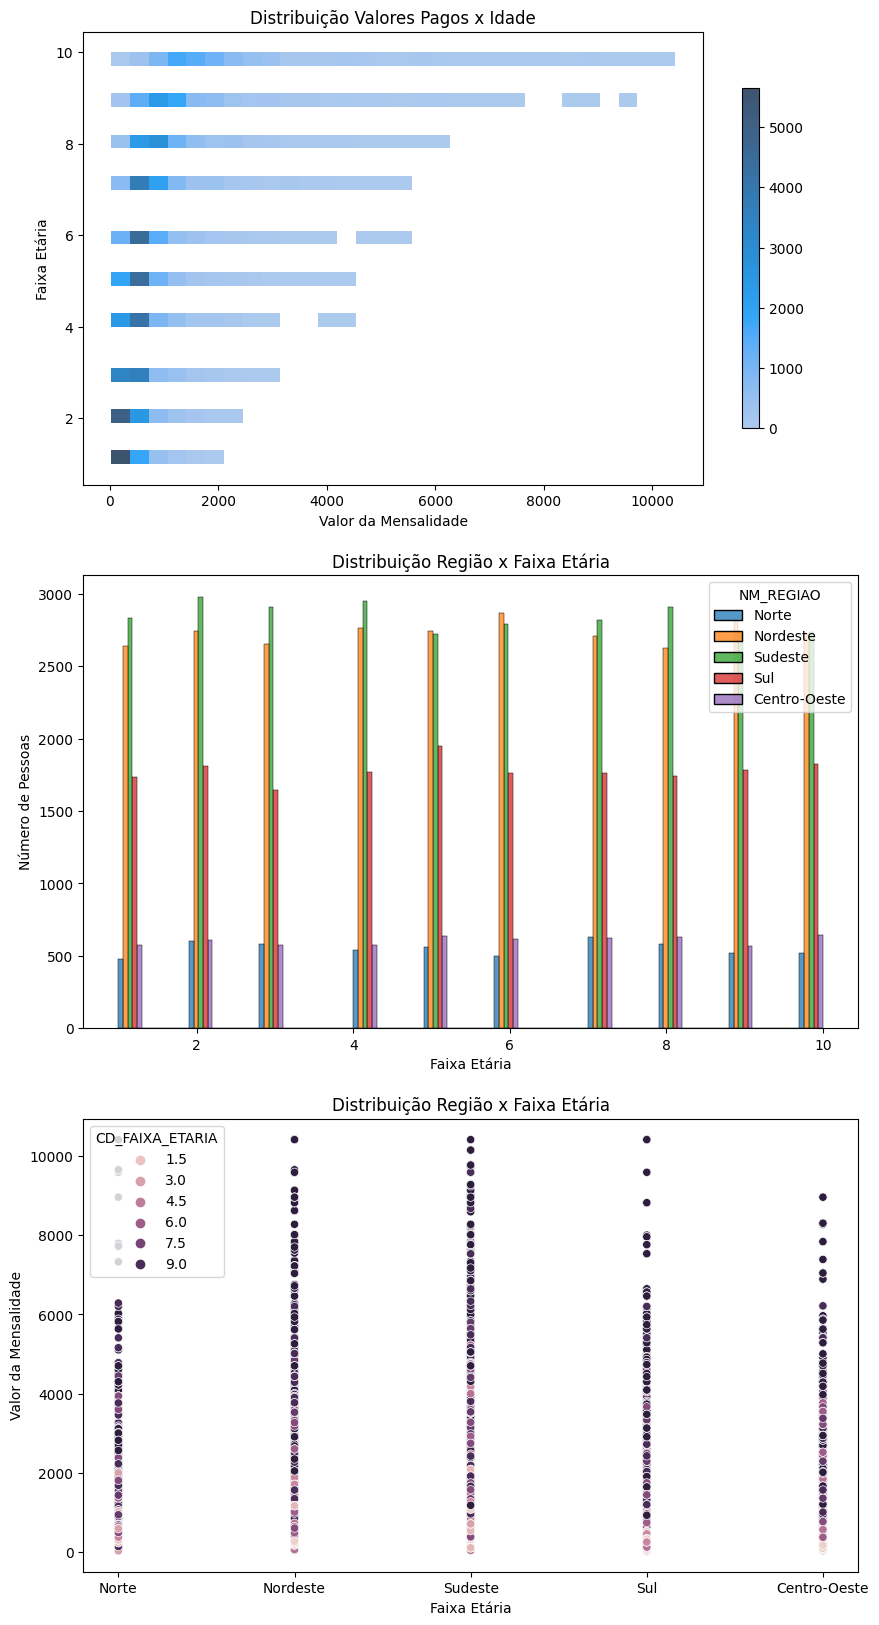

In [41]:
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
sns.histplot(data=tabela_completa_filtrada, x="VCM", y="CD_FAIXA_ETARIA", bins=30, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Distribuição Valores Pagos x Idade')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Faixa Etária')

plt.subplot(3, 1, 2)
sns.histplot(data=tabela_completa_filtrada, x="CD_FAIXA_ETARIA", hue="NM_REGIAO", bins=30, multiple="dodge")
plt.title('Distribuição Região x Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')

plt.subplot(3, 1, 3)
sns.scatterplot(data=tabela_completa_filtrada, hue="CD_FAIXA_ETARIA", y="VCM", x="NM_REGIAO")
plt.title('Distribuição Região x Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor da Mensalidade')

plt.show()

Faixa etária do beneficiário vinculado ao contrato:
(01)  00 (zero) a 18 (dezoito) anos;
(02)  19 (dezenove) a 23 (vinte e três) anos;
(03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
(04)  29 (vinte e nove) a 33 (trinta e três) anos;
(05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
(06)  39 (trinta e nove) a 43 (quarenta e três) anos;
(07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
(08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
(09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
(10)  59 (cinquenta e nove) anos ou mais.”
Nota:  As faixas etárias da NTRP seguem o determinado pelo Art. 2º da Resolução Normativa ANS Nº 563, de 15 de dezembro de 2022.

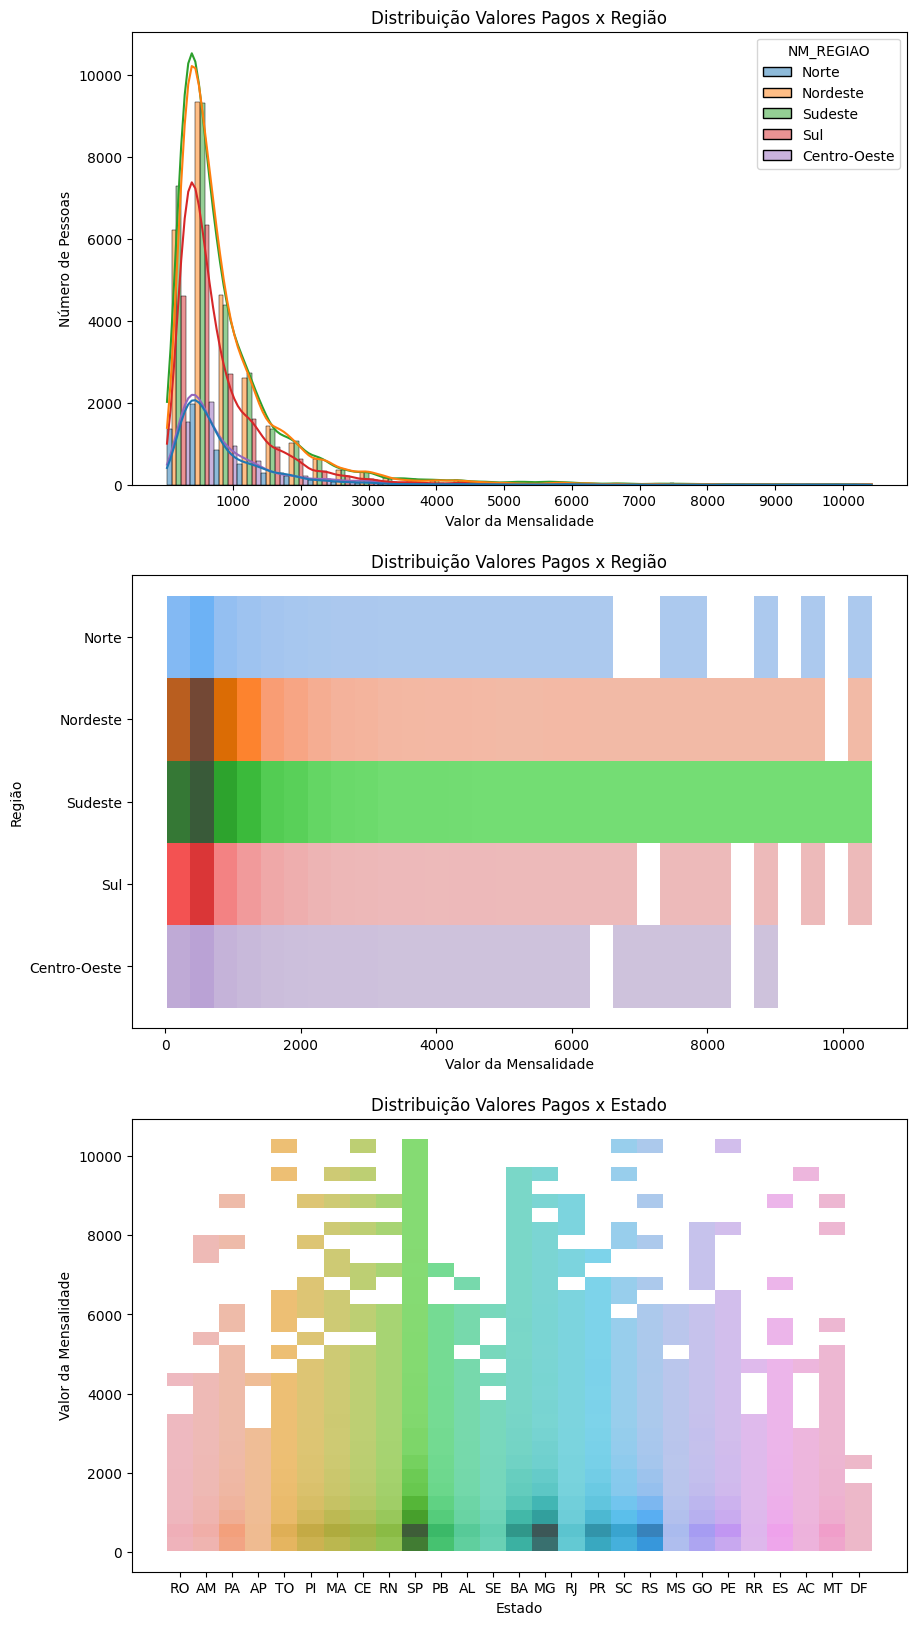

In [43]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1)
sns.histplot(data=tabela_completa_filtrada, x="VCM", hue="NM_REGIAO", bins=30, multiple="dodge", kde=True)
plt.title('Distribuição Valores Pagos x Região')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Número de Pessoas')
plt.xticks([1000.00, 2000.00, 3000.00, 4000.00, 5000.00, 6000.00, 7000.00, 8000.00, 9000.00, 10000.00])

plt.subplot(3, 1, 2)
sns.histplot(data=tabela_completa_filtrada, x="VCM", y="NM_REGIAO", hue="NM_REGIAO", bins=30, legend=False)
plt.title('Distribuição Valores Pagos x Região')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Região')

plt.subplot(3, 1, 3)
sns.histplot(data=tabela_completa_filtrada, y="VCM", x="SG_UF", hue="SG_UF", bins=30, legend=False)
plt.title('Distribuição Valores Pagos x Estado')
plt.xlabel('Estado')
plt.ylabel('Valor da Mensalidade')
plt.show()

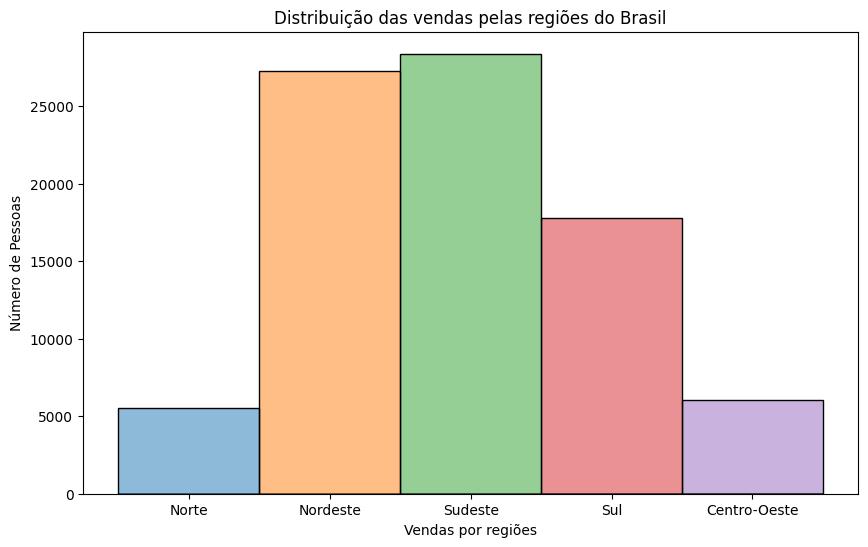

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tabela_completa_filtrada, x="NM_REGIAO", hue="NM_REGIAO", bins=30, legend=False)
plt.title('Distribuição das vendas pelas regiões do Brasil')
plt.xlabel('Vendas por regiões')
plt.ylabel('Número de Pessoas')
plt.show()